In [32]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

## Q1

Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a random kernel of size (3,3) using torch.nn.functional.conv2d.

```
import torch
import torch.nn.functional as F

# Create a random image of shape (6,6)
image = torch.rand(6, 6)
print("image=", image)

# Add a new dimension along 0th dimension
# i.e. (6,6) becomes (1,6,6). This is because
# pytorch expects the input to conv2D as a 4D tensor
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)

image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)

# Create a kernel of size (3,3)
kernel = torch.ones(3, 3)
# kernel = torch.rand(3, 3)
print("kernel=", kernel)

# Add dimensions to the kernel to match the expected shape for conv2d
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)

# Perform the convolution
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)
```

---

**Questions:**

1. What is the dimension of the output image?
2. Apply various values for the parameter `stride=1` and note the change in the dimension of the output image.
3. Arrive at an equation for the output image size with respect to the kernel size and stride and verify your answer with code.
4. Now, repeat the exercise by changing the `padding` parameter. Obtain a formula using kernel size, stride, and padding to get the output image size.
5. What is the total number of parameters in your network? Verify with code.



In [33]:
image = torch.rand(6, 6)
print("image=", image)

image = image.unsqueeze(dim=0).unsqueeze(dim=0)
print("image.shape=", image.shape)

kernel = torch.ones(3, 3)
print("kernel=", kernel)

kernel = kernel.unsqueeze(dim=0).unsqueeze(dim=0)
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)

input_height, input_width = 6, 6
kernel_height, kernel_width = 3, 3
stride = 1
padding = 0

output_height = (input_height - kernel_height + 2 * padding) // stride + 1
output_width = (input_width - kernel_width + 2 * padding) // stride + 1

print("Manually calculated output dimensions:", output_height, output_width)

stride_values = [1, 2]
for stride in stride_values:
    outimage_stride = F.conv2d(image, kernel, stride=stride, padding=0)
    print(f"Output image with stride={stride}:")
    print(outimage_stride)
    print("Output image shape:", outimage_stride.shape)


padding_values = [0, 1]
for padding in padding_values:
    outimage_padding = F.conv2d(image, kernel, stride=1, padding=padding)
    print(f"Output image with padding={padding}:")
    print(outimage_padding)
    print("Output image shape:", outimage_padding.shape)

num_params = kernel.numel()
print("Total number of parameters in the network:", num_params)


image= tensor([[0.0496, 0.5882, 0.9285, 0.4710, 0.9309, 0.3212],
        [0.4180, 0.5662, 0.8067, 0.7588, 0.2354, 0.6823],
        [0.7969, 0.7428, 0.9635, 0.3809, 0.2715, 0.1276],
        [0.2715, 0.1924, 0.2226, 0.1033, 0.2704, 0.0424],
        [0.9760, 0.1834, 0.5188, 0.8913, 0.0992, 0.7524],
        [0.3597, 0.7437, 0.3613, 0.4722, 0.5980, 0.1958]])
image.shape= torch.Size([1, 1, 6, 6])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage= tensor([[[[5.8604, 6.2064, 5.7470, 4.1795],
          [4.9806, 4.7371, 4.0130, 2.8725],
          [4.8679, 4.1989, 3.7214, 2.9388],
          [3.8294, 3.6889, 3.5370, 3.4249]]]])
Manually calculated output dimensions: 4 4
Output image with stride=1:
tensor([[[[5.8604, 6.2064, 5.7470, 4.1795],
          [4.9806, 4.7371, 4.0130, 2.8725],
          [4.8679, 4.1989, 3.7214, 2.9388],
          [3.8294, 3.6889, 3.5370, 3.4249]]]])
Output image shape: torch.Size([1, 1, 4, 4])
Output image with stride=2:
tensor([[[[5.8604, 

## Q2

Apply `torch.nn.Conv2d` to the input image of Qn 1 with `out-channel=3` and observe the
output. Implement the equivalent of `torch.nn.Conv2d` using the `torch.nn.functional.conv2D`
to get the same output. You may ignore bias.

In [34]:
image = torch.rand(6, 6)
print("image=", image)

image = image.unsqueeze(dim=0).unsqueeze(dim=0)
print("image.shape=", image.shape)

kernel = torch.ones(3, 3)
print("kernel=", kernel)

kernel = kernel.unsqueeze(dim=0).unsqueeze(dim=0)

outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage using F.conv2d=", outimage)

# modifications
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
output_conv_layer = conv_layer(image)
print("\nOutput using torch.nn.Conv2d (with out_channels=3):")
print(output_conv_layer)
print("Output shape:", output_conv_layer.shape)
kernel = conv_layer.weight

output_func = F.conv2d(image, kernel, stride=1, padding=0)
print("\nOutput using torch.nn.functional.conv2d:")
print(output_func)
print("Output shape:", output_func.shape)

print("\nOutputs are the same: ", torch.allclose(output_conv_layer, output_func))
# /modification

input_height, input_width = 6, 6
kernel_height, kernel_width = 3, 3
stride = 1
padding = 0

output_height = (input_height - kernel_height + 2 * padding) // stride + 1
output_width = (input_width - kernel_width + 2 * padding) // stride + 1

print("Manually calculated output dimensions:", output_height, output_width)

stride_values = [1, 2]
for stride in stride_values:
    outimage_stride = F.conv2d(image, kernel, stride=stride, padding=0)
    print(f"Output image with stride={stride}:")
    print(outimage_stride)
    print("Output image shape:", outimage_stride.shape)

padding_values = [0, 1]
for padding in padding_values:
    outimage_padding = F.conv2d(image, kernel, stride=1, padding=padding)
    print(f"Output image with padding={padding}:")
    print(outimage_padding)
    print("Output image shape:", outimage_padding.shape)

num_params = kernel.numel()
print("Total number of parameters in the network:", num_params)

image= tensor([[0.5582, 0.3486, 0.0574, 0.1596, 0.0510, 0.1922],
        [0.0536, 0.8372, 0.8619, 0.2851, 0.4732, 0.5187],
        [0.6849, 0.5980, 0.7933, 0.8741, 0.2417, 0.2898],
        [0.5994, 0.2735, 0.0435, 0.7836, 0.1514, 0.3684],
        [0.8291, 0.2239, 0.5424, 0.0955, 0.9803, 0.0881],
        [0.8080, 0.3531, 0.0334, 0.0209, 0.7655, 0.4628]])
image.shape= torch.Size([1, 1, 6, 6])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage using F.conv2d= tensor([[[[4.7931, 4.8153, 3.7973, 3.0854],
          [4.7452, 5.3502, 4.5079, 3.9860],
          [4.5879, 4.2278, 4.5059, 3.8728],
          [3.7063, 2.3697, 3.4165, 3.7164]]]])

Output using torch.nn.Conv2d (with out_channels=3):
tensor([[[[-0.0359,  0.1666,  0.0418, -0.0396],
          [ 0.1412,  0.2963,  0.0708,  0.3532],
          [ 0.4852,  0.1512,  0.4403,  0.0899],
          [ 0.0870,  0.0324,  0.2851,  0.0013]],

         [[-0.2266,  0.0043,  0.2957, -0.0948],
          [-0.1703, -0.3731, -0.

## Q3

Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the
classification accuracy in the form of a Confusion matrix. Verify the number of learnable
parameters in the model.

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import numpy as np

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2,2), stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2,2), stride=2),
            nn.Conv2d(128, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2,2), stride=2)
        )

        self.classification_head = nn.Sequential(
            nn.Linear(64, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 10, bias=True)
        )
    
    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST('../data/', train=True, download=True, transform=transform)
test_data = datasets.MNIST('../data/', train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

model = CNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Accuracy: {accuracy*100}%")
print("Confusion Matrix: ")
print(cm)

print(f"Number of params: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

Epoch 1, Loss: 0.2864010666312376
Epoch 2, Loss: 0.07653272783369827
Epoch 3, Loss: 0.053003367635536626
Epoch 4, Loss: 0.04294171219443166
Epoch 5, Loss: 0.034797830216772505
Epoch 6, Loss: 0.027936443769980394
Epoch 7, Loss: 0.022847493153979142
Epoch 8, Loss: 0.020741724993939004
Epoch 9, Loss: 0.017349351532722067
Epoch 10, Loss: 0.016628135618671772
Accuracy: 98.78%
Confusion Matrix: 
[[ 974    1    0    0    1    0    1    2    1    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   1    0 1016    0    0    0    1   14    0    0]
 [   1    1    4  995    0    2    0    5    1    1]
 [   1    0    0    0  974    0    0    1    1    5]
 [   4    1    3    3    0  869    1    1    3    7]
 [   6    2    1    0    4    1  940    0    4    0]
 [   0    2    2    0    0    0    0 1021    1    2]
 [   0    0    0    1    2    0    0    2  964    5]
 [   4    0    0    0    5    1    0    4    2  993]]
Number of params: 149798


## Q4
Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of
percentage drop in parameters vs accuracy.


Training Original configuration
Epoch 1, Loss: 0.2351
Epoch 2, Loss: 0.0727
Epoch 3, Loss: 0.0524
Epoch 4, Loss: 0.0414
Epoch 5, Loss: 0.0342
Epoch 6, Loss: 0.0271
Epoch 7, Loss: 0.0233
Epoch 8, Loss: 0.0188
Epoch 9, Loss: 0.0171
Epoch 10, Loss: 0.0135

Training Small Conv configuration
Epoch 1, Loss: 0.4001
Epoch 2, Loss: 0.1083
Epoch 3, Loss: 0.0791
Epoch 4, Loss: 0.0639
Epoch 5, Loss: 0.0546
Epoch 6, Loss: 0.0460
Epoch 7, Loss: 0.0428
Epoch 8, Loss: 0.0357
Epoch 9, Loss: 0.0302
Epoch 10, Loss: 0.0266

Training Tiny Conv configuration
Epoch 1, Loss: 0.5896
Epoch 2, Loss: 0.1853
Epoch 3, Loss: 0.1413
Epoch 4, Loss: 0.1193
Epoch 5, Loss: 0.1006
Epoch 6, Loss: 0.0866
Epoch 7, Loss: 0.0783
Epoch 8, Loss: 0.0719
Epoch 9, Loss: 0.0658
Epoch 10, Loss: 0.0619

Training Shallow Linear configuration
Epoch 1, Loss: 0.3847
Epoch 2, Loss: 0.0948
Epoch 3, Loss: 0.0680
Epoch 4, Loss: 0.0520
Epoch 5, Loss: 0.0442
Epoch 6, Loss: 0.0371
Epoch 7, Loss: 0.0317
Epoch 8, Loss: 0.0255
Epoch 9, Loss: 0.021

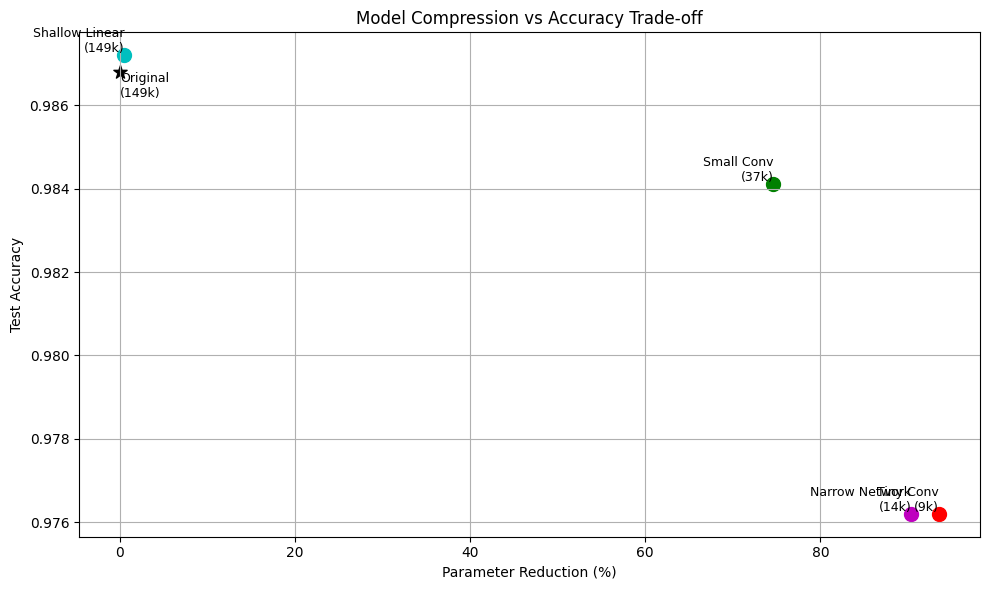

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

class CNNClassifier(nn.Module):
    def __init__(self, conv_channels=[64, 128, 64], linear_dims=[20]):
        super().__init__()
        self.net = nn.Sequential()
        in_channels = 1
        
        for out_channels in conv_channels:
            self.net.append(nn.Conv2d(in_channels, out_channels, kernel_size=3))
            self.net.append(nn.ReLU())
            self.net.append(nn.MaxPool2d((2,2), stride=2))
            in_channels = out_channels

        self.linear_input_size = in_channels * 1 * 1
        

        self.classification_head = nn.Sequential()
        in_features = self.linear_input_size
        for dim in linear_dims:
            self.classification_head.append(nn.Linear(in_features, dim))
            self.classification_head.append(nn.ReLU())
            in_features = dim
        self.classification_head.append(nn.Linear(in_features, 10))
    
    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))

configurations = [
    {'name': 'Original', 'conv': [64, 128, 64], 'linear': [20]},
    {'name': 'Small Conv', 'conv': [32, 64, 32], 'linear': [16]},
    {'name': 'Tiny Conv', 'conv': [16, 32, 16], 'linear': [8]},
    {'name': 'Shallow Linear', 'conv': [64, 128, 64], 'linear': [10]},
    {'name': 'Narrow Network', 'conv': [32, 32, 16], 'linear': [8]},
]

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST('../data/', train=True, download=True, transform=transform)
test_data = datasets.MNIST('../data/', train=False, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

results = []

for config in configurations:
    print(f"\nTraining {config['name']} configuration")
    model = CNNClassifier(config['conv'], config['linear']).to(device)
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    model.train()
    for epoch in range(10):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")
    
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    results.append({
        'name': config['name'],
        'params': num_params,
        'accuracy': accuracy
    })

original_params = next(r['params'] for r in results if r['name'] == 'Original')
for r in results:
    r['pct_drop'] = ((original_params - r['params']) / original_params) * 100

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm']
for i, r in enumerate(results):
    if r['name'] != 'Original':
        plt.scatter(r['pct_drop'], r['accuracy'], color=colors[i], s=100)
        plt.text(r['pct_drop'], r['accuracy'], f"{r['name']}\n({r['params']//1000}k)", 
                 fontsize=9, ha='right', va='bottom')

original = next(r for r in results if r['name'] == 'Original')
plt.scatter(original['pct_drop'], original['accuracy'], color='k', s=100, marker='*')
plt.text(original['pct_drop'], original['accuracy'], "Original\n(149k)", 
         fontsize=9, ha='left', va='top')

plt.xlabel('Parameter Reduction (%)')
plt.ylabel('Test Accuracy')
plt.title('Model Compression vs Accuracy Trade-off')
plt.grid(True)
plt.tight_layout()
plt.show()